In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import math
from skimage.metrics import structural_similarity, mean_squared_error

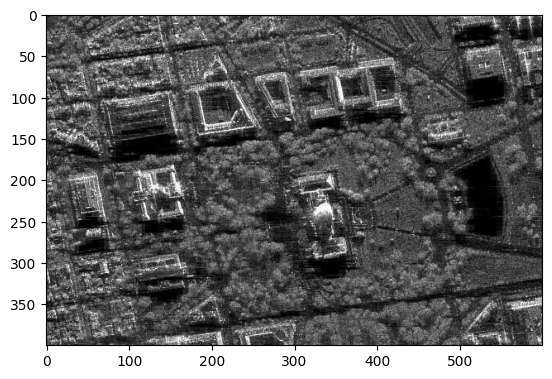

In [4]:
image = cv2.imread("sar_1_gray.jpg")
plt.imshow(image)

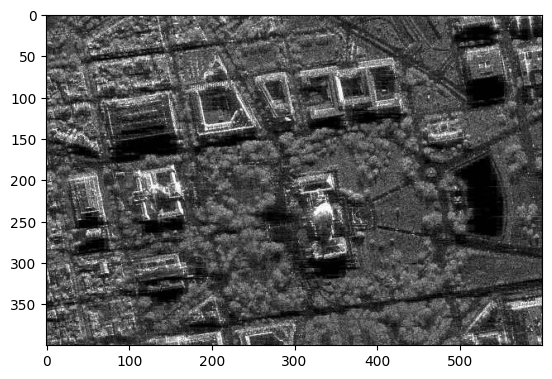

In [5]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

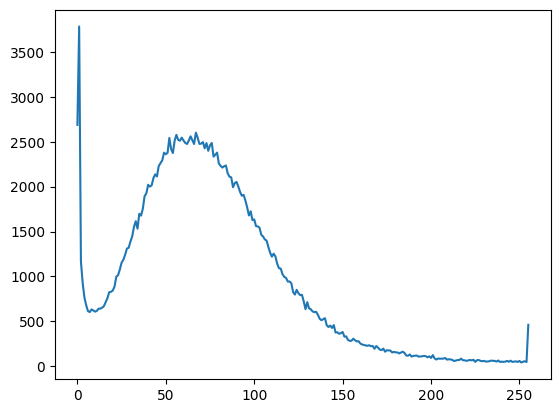

In [6]:
def make_hist(image):
    histSize = 256
    histRange = (0, 256)
    accumulate = False
    return cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)

hist = make_hist(image_gray)
plt.plot(hist)

Алгоритм гамма коррекции

In [7]:
def gamma_pixel(pixel, gamma):
    return (pow(pixel/255, gamma)* 255).astype("uint8")

def gamma_filter(image, gamma):
    g_img = copy.deepcopy(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
                g_img[x, y] = gamma_pixel(g_img[x, y], gamma)  
    return g_img 

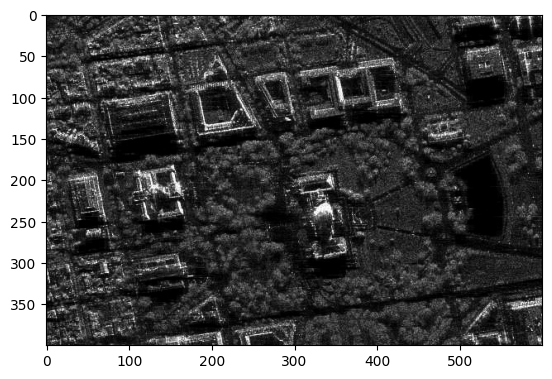

In [8]:
#гамма > 1

image_gamma_great = gamma_filter(image_gray, 1.5)
plt.imshow(image_gamma_great, cmap="gray")

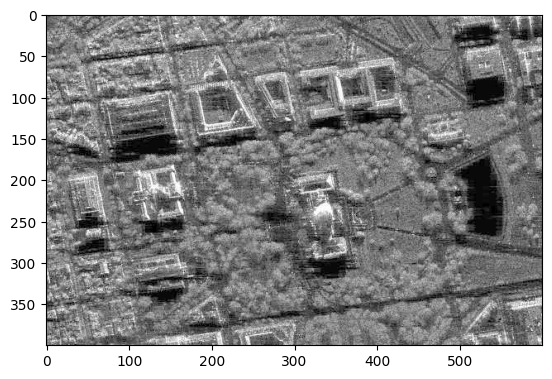

In [9]:
image_gamma_less = gamma_filter(image_gray, 0.6)
plt.imshow(image_gamma_less, cmap="gray")

Разница между изображениями

In [10]:
def diff_image(img1, img2):
    (ssim, diff) = structural_similarity(img1, img2, full = True)
    diff = (diff * 255).astype("uint8")
    print("SSIM: {}".format(ssim))

    mse = mean_squared_error(img1, img2)
    print("MSE: {}".format(mse))
    return diff

SSIM: 0.8065788107754002
MSE: 971.8206541666667


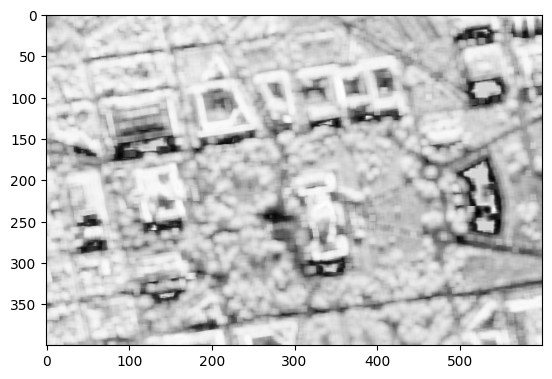

In [11]:
#сравнение с гамма > 1
diff_gamma_first = diff_image(image_gray, image_gamma_great)
plt.imshow(diff_gamma_first, cmap="gray")

SSIM: 0.8535234101754708
MSE: 1784.2674875


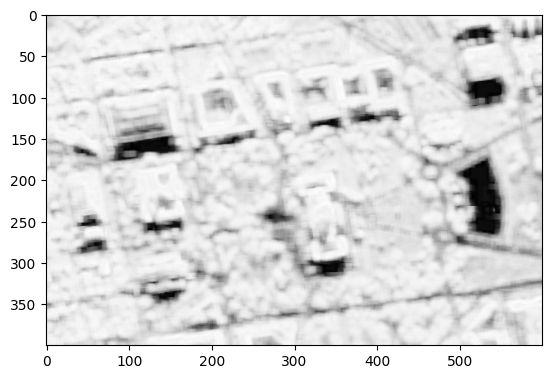

In [12]:
#сравнение с гамма < 1
diff_gamma_second = diff_image(image_gray, image_gamma_less)
plt.imshow(diff_gamma_second, cmap="gray")

Статистический фильтр

In [13]:
def expectation(image):
    res = 0
    size = float(image.shape[0] * image.shape[1]);
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            res = res + image[x, y]
    res = float(res) / size
    return res

def dispesion(image, expectation):
    size = float(image.shape[0] * image.shape[1])
    res = 0
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            res = res + int(image[x, y] - expectation)**2
    res = math.sqrt(float(res) / size)
    return res

def statistic_filter(src):
    gray_img = copy.deepcopy(src)
    eq_gray = cv2.equalizeHist(gray_img)
    
    e_source = expectation(gray_img)
    e_target = expectation(eq_gray)

    d_source = dispesion(gray_img, e_source)
    d_target = dispesion(eq_gray, e_target)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            gray_img[x,y] = e_target + (gray_img[x,y] - e_source) * d_target / d_source
    return gray_img

/var/folders/q4/lrxh2j8x1434mqt345d550qr0000gn/T/ipykernel_3477/1495583526.py:6: RuntimeWarning: overflow encountered in scalar add
  res = res + image[x, y]


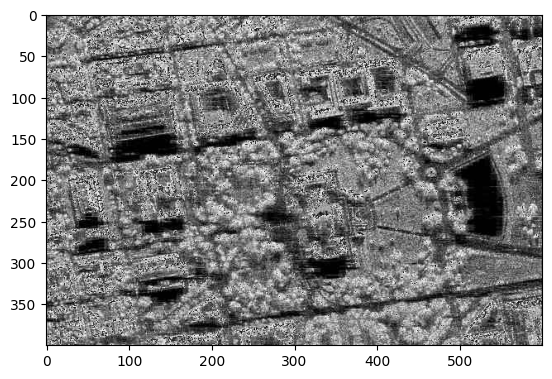

In [14]:
image_statistick_filtered = statistic_filter(image_gray)
plt.imshow(image_statistick_filtered, cmap='gray')

Пороговая фильтрация

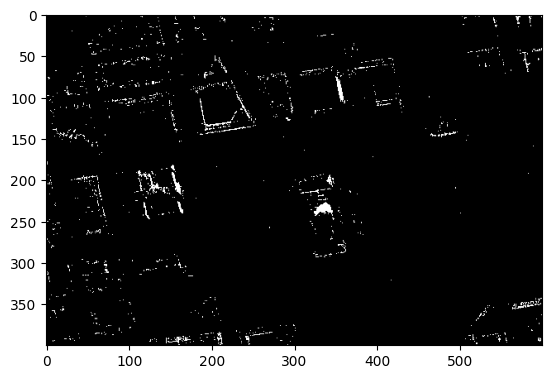

In [15]:
_,thresh1 = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")

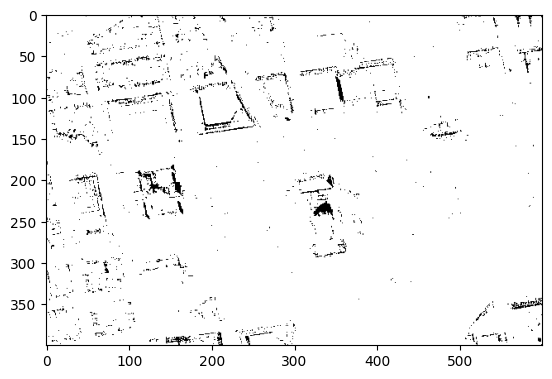

In [16]:
_,thresh2 = cv2.threshold(image_gray, 180, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, cmap="gray")

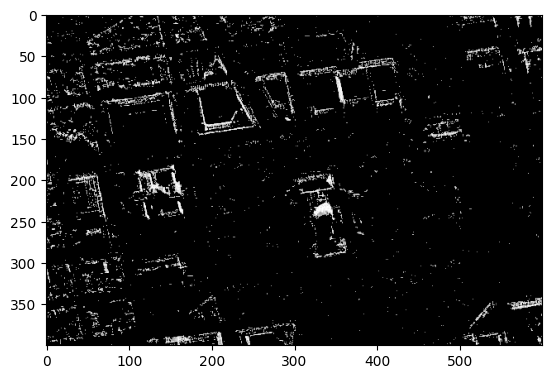

In [17]:
_,thresh3 = cv2.threshold(image_gray, 150, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh3, cmap="gray")

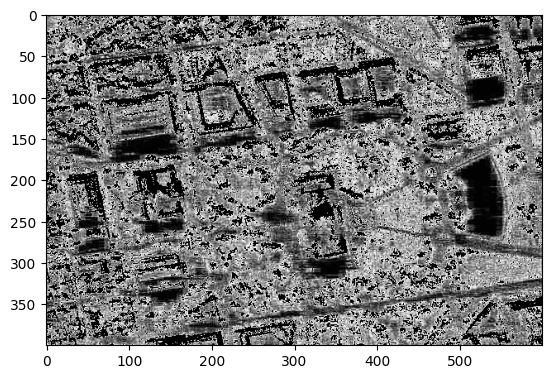

In [18]:
_,thresh4 = cv2.threshold(image_gray, 100, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh4, cmap="gray")